In [1]:
# !pip install beautifulsoup4
# !pip install lxml
pip install requests

In [2]:
url = 'https://www.worldometers.info/coronavirus/'

In [3]:
import requests

In [6]:
# requests.get(url).text

In [7]:
content = requests.get(url).text

In [8]:
type(content)

str

In [9]:
from bs4 import BeautifulSoup

In [10]:
soup = BeautifulSoup(content, 'html.parser')

In [15]:
tb = soup.find('tbody')

In [19]:
table_row = tb.find_all('tr')

In [27]:
table_row[8]

<tr style="">
<td style="font-size:12px;color: grey;text-align:center;vertical-align:middle;">1</td>
<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/us/">USA</a></td>
<td style="font-weight: bold; text-align:right">102,668,952</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="font-weight: bold; text-align:right;">1,118,376                                </td>
<td style="font-weight: bold; 
                                    text-align:right;"></td>
<td style="font-weight: bold; text-align:right">99,546,779</td>
<td style="font-weight: bold; text-align:right;"></td>
<td style="text-align:right;font-weight:bold;">2,003,797</td>
<td style="font-weight: bold; text-align:right">4,529</td>
<td style="font-weight: bold; text-align:right">306,653</td>
<td style="font-weight: bold; text-align:right">3,340</td>
<td style="font-weight: bold; text-align:right">1,153,732,986</td>
<td style="font-weight: bold; text-align:right">3,44

In [36]:
all_data = list()
for item in range(8, len(table_row)):
    country_data = list()
    tr = table_row[item]
    td = tr.find_all('td')
    for dp in td: # scrapes each country data 
        country_data.append(dp.text)
        
    all_data.append(country_data) # append each country data to whole data

In [41]:
all_data[0]

['1',
 'USA',
 '102,668,952',
 '',
 '1,118,376                                ',
 '',
 '99,546,779',
 '',
 '2,003,797',
 '4,529',
 '306,653',
 '3,340',
 '1,153,732,986',
 '3,445,982',
 '334,805,269 ',
 'North America',
 '3',
 '299',
 '0',
 '',
 '',
 '5,985']

In [42]:
# 1:10 14

In [43]:
map(lambda x: x[1:10] + [x[14]], all_data)

In [52]:
[all_data[0][14]]

['334,805,269 ']

In [50]:
all_data[0][1:10]

['USA',
 '102,668,952',
 '',
 '1,118,376                                ',
 '',
 '99,546,779',
 '',
 '2,003,797',
 '4,529']

In [45]:
filtered_data = list(map(lambda x: x[1:10] + [x[14]], all_data))

In [46]:
filtered_data[0]

['USA',
 '102,668,952',
 '',
 '1,118,376                                ',
 '',
 '99,546,779',
 '',
 '2,003,797',
 '4,529',
 '334,805,269 ']

In [53]:
column_names = ['country', 
                'total cases',
                'new cases', 
                'total_death',
               'new death',
               'total recovered', 
               'new recovered', 
               'active cases', 
               'serious', 
               'population']

In [55]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [57]:
import pandas as pd

In [58]:
pd.DataFrame(filtered_data)

,0,1,2,3,4,5,6,7,8,9
0,USA,"102,668,952",,"1,118,376",,"99,546,779",,"2,003,797","4,529","334,805,269"
1,India,"44,679,905",,"530,705",,"44,145,238",,"3,962",698,"1,406,631,776"
2,France,"39,331,022",,"161,962",,"38,353,759",,"815,301",869,"65,584,518"
3,Germany,"37,369,865",,"161,465",,"36,622,900",,"585,500","1,406","83,883,596"
4,Brazil,"36,357,101",,"693,949",,"34,938,186",,"724,966","8,318","215,353,593"
...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29,,,,29,,0,,799
227,Western Sahara,10,,1,,9,,0,,"626,161"
228,MS Zaandam,9,,2,,7,,0,,
229,Tokelau,5,,,,,,5,,"1,378"


In [60]:
df = pd.DataFrame(filtered_data, columns = column_names)

In [61]:
df

,country,total cases,new cases,total_death,new death,total recovered,new recovered,active cases,serious,population
0,USA,"102,668,952",,"1,118,376",,"99,546,779",,"2,003,797","4,529","334,805,269"
1,India,"44,679,905",,"530,705",,"44,145,238",,"3,962",698,"1,406,631,776"
2,France,"39,331,022",,"161,962",,"38,353,759",,"815,301",869,"65,584,518"
3,Germany,"37,369,865",,"161,465",,"36,622,900",,"585,500","1,406","83,883,596"
4,Brazil,"36,357,101",,"693,949",,"34,938,186",,"724,966","8,318","215,353,593"
...,...,...,...,...,...,...,...,...,...,...
226,Vatican City,29,,,,29,,0,,799
227,Western Sahara,10,,1,,9,,0,,"626,161"
228,MS Zaandam,9,,2,,7,,0,,
229,Tokelau,5,,,,,,5,,"1,378"


In [62]:
df.to_csv('covid-jan2.csv', index = False)

# read csv file using pandas

In [64]:
covid_data = pd.read_csv('covid-jan2.csv')

In [66]:
covid_data.head()

,country,total cases,new cases,total_death,new death,total recovered,new recovered,active cases,serious,population
0,USA,"102,668,952",NaN,"1,118,376",NaN,"99,546,779",NaN,"2,003,797","4,529","334,805,269"
1,India,"44,679,905",NaN,"530,705",NaN,"44,145,238",NaN,"3,962",698,"1,406,631,776"
2,France,"39,331,022",NaN,"161,962",NaN,"38,353,759",NaN,"815,301",869,"65,584,518"
3,Germany,"37,369,865",NaN,"161,465",NaN,"36,622,900",NaN,"585,500","1,406","83,883,596"
4,Brazil,"36,357,101",NaN,"693,949",NaN,"34,938,186",NaN,"724,966","8,318","215,353,593"


In [68]:
covid_data.tail(20)

,country,total cases,new cases,total_death,new death,total recovered,new recovered,active cases,serious,population
211,Sao Tome and Principe,"6,279",NaN,77,NaN,"6,202",NaN,0,NaN,"227,679"
212,Palau,"5,971",NaN,9,NaN,"5,958",NaN,4,1,"18,233"
213,St. Barth,"5,382",NaN,6,NaN,NaN,NaN,NaN,NaN,"9,945"
214,Nauru,"4,621",NaN,1,NaN,"4,609",NaN,11,NaN,"10,903"
215,Anguilla,"3,904",NaN,12,NaN,"3,879",NaN,13,4,"15,230"
216,Kiribati,"3,430",NaN,13,NaN,"2,703",NaN,714,3,"123,419"
217,Wallis and Futuna,"3,415",NaN,7,NaN,438,NaN,"2,970",NaN,"10,982"
218,Saint Pierre Miquelon,"3,349",NaN,2,NaN,"2,449",NaN,898,1,"5,759"
219,Tuvalu,"2,805",NaN,,NaN,NaN,NaN,"2,805",NaN,"12,066"
220,Macao,"2,615",NaN,47,NaN,"1,803",NaN,765,NaN,"667,490"


# NaN is a missing data / value

In [69]:
covid_data.isna()

,country,total cases,new cases,total_death,new death,total recovered,new recovered,active cases,serious,population
0,False,False,True,False,True,False,True,False,False,False
1,False,False,True,False,True,False,True,False,False,False
2,False,False,True,False,True,False,True,False,False,False
3,False,False,True,False,True,False,True,False,False,False
4,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
226,False,False,True,False,True,False,True,False,True,False
227,False,False,True,False,True,False,True,False,True,False
228,False,False,True,False,True,False,True,False,True,False
229,False,False,True,False,True,True,True,False,True,False


In [70]:
True + True

2

In [71]:
True + False

1

In [72]:
False + False

0

In [73]:
covid_data.isna().sum()

country              0
total cases          0
new cases          228
total_death          0
new death          230
total recovered     21
new recovered      219
active cases        19
serious             93
population           0
dtype: int64

<AxesSubplot:>

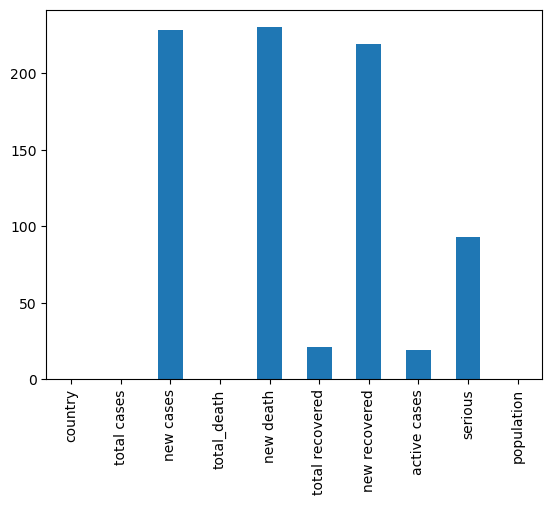

In [74]:
covid_data.isna().sum().plot.bar()

<AxesSubplot:ylabel='None'>

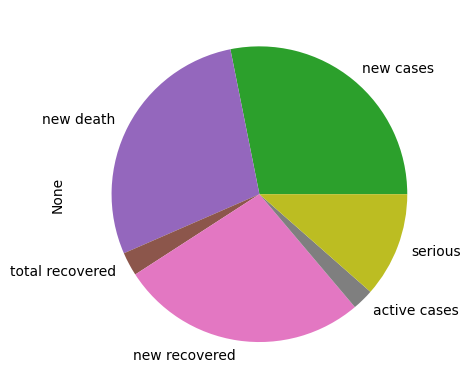

In [75]:
covid_data.isna().sum().plot.pie()

In [76]:
import seaborn as sns

In [79]:
covid_data.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
country,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
total cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new cases,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total_death,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
new death,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
total recovered,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
new recovered,True,True,True,True,True,True,False,True,False,True,...,True,True,True,True,True,True,True,True,True,True
active cases,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
serious,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
population,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

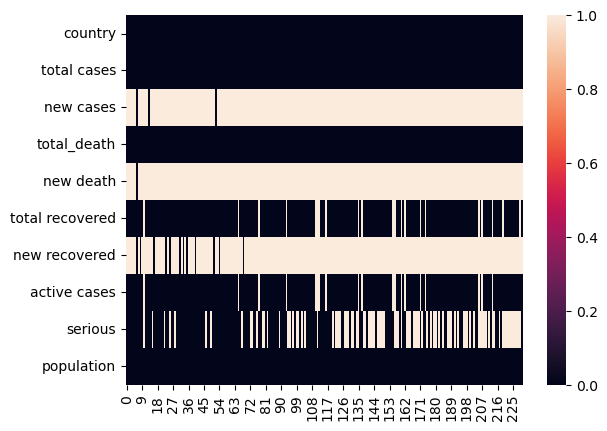

In [77]:
sns.heatmap(covid_data.isna().transpose())